### Multi class classification

In [201]:
import warnings
warnings.filterwarnings("ignore")
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [202]:
# set hyperparametrs

NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
N_SAMPLES = 1000

In [203]:
X_blob, y_blob = make_blobs(n_samples=N_SAMPLES, 
                            random_state=RANDOM_SEED,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASS,
                            )

In [204]:
y_blob[:5]

array([3, 2, 2, 1, 1])

In [205]:
# turn data into tensors
type(X_blob)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


In [206]:
X_blob.dtype, y_blob.dtype

(torch.float32, torch.int64)

In [207]:
# Split the data

X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob,y_blob, train_size=0.8, random_state=RANDOM_SEED) 



In [208]:
len(X_train_blob)

800

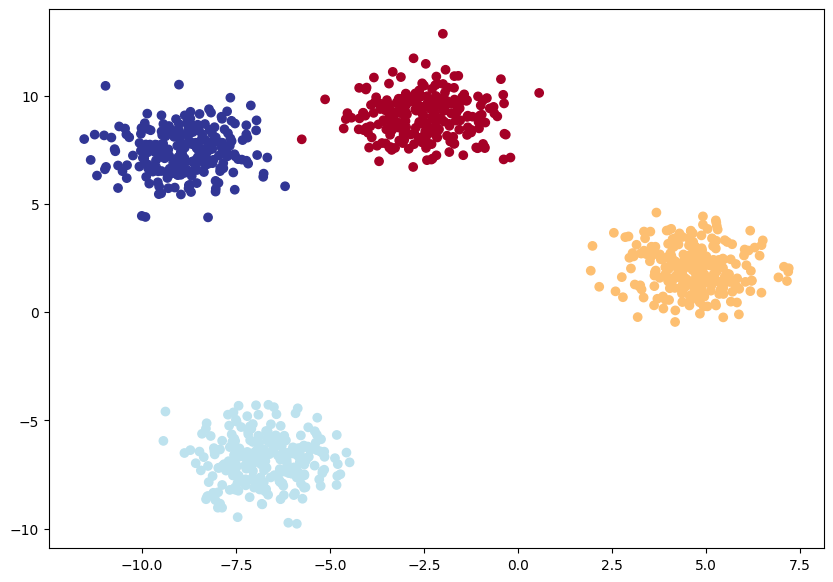

In [209]:
# visualize the features data
plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap="RdYlBu")

In [210]:
# create device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [211]:
X_train_blob = X_train_blob.to(device)
X_test_blob = X_test_blob.to(device)
y_test_blob = y_test_blob.to(device)
y_train_blob = y_train_blob.to(device)

In [212]:
# model
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """
        Initilise the classification model

        Args:
            input_features (_type_): _description_
            output_features (_type_): _description_
            hidden_units (int, optional): _description_. Defaults to 8.
        """
        super().__init__()
        self.liner_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features= output_features)
        )
        
    def forward(self, x:torch.Tensor):
        return self.liner_layer_stack(x)
        
        

In [213]:
torch.unique(y_test_blob)

tensor([0, 1, 2, 3])

In [214]:
# create an instance

model_4 = BlobModel(input_features=2, output_features=4).to(device)

In [215]:
next(model_4.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)

In [216]:
model_4.state_dict()

OrderedDict([('liner_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('liner_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('liner_layer_stack.1.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, 

In [217]:
# create loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [218]:
# See how bad ur untrained model performs
model_4.eval()

with torch.inference_mode():
    logits = model_4(X_test_blob[:5])
    
logits

tensor([[-1.1988, -0.6983, -1.4013, -0.6101],
        [ 1.7765, -1.2490,  1.7994,  2.1650],
        [ 2.2684,  0.7261,  2.6267,  1.0674],
        [-0.8950, -0.4057, -1.0242, -0.5896],
        [-0.2137, -1.5658, -0.4405,  0.8248]])

In [219]:
# convert logits into predition probablities
# use softmax output activation function

torch.argmax(torch.softmax(logits, dim=1), dim=1)


tensor([3, 3, 2, 1, 3])

In [220]:
y_test_blob[:5]

# calculate accuracy

def accuracy_fn(y_pred, y_true):
    corrct = torch.eq(y_pred,y_true).sum().item()
    acc = (corrct/ len(y_true)) * 100
    return acc


y_train_blob.dtype,  train_logits.dtype

(torch.int64, torch.float32)

In [221]:
# training loop

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
EPOCHS =  71

for epoch in range(EPOCHS):
    model_4.train()
    #forward pass
    train_logits = model_4(X_train_blob)
    # otput activation function
    train_preds = torch.softmax(train_logits, dim=1).argmax(dim=1)
    
    # calc the loss
    train_loss = loss_fn(train_logits, y_train_blob)
    train_acc = accuracy_fn(train_preds ,y_train_blob)
    
    #zero grad
    optimizer.zero_grad
    
    train_loss.backward()
    optimizer.step()
    
    #eval mode
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test_blob)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_acc = accuracy_fn(test_preds, y_test_blob)
        test_loss = loss_fn(test_logits, y_test_blob)
        
        if epoch%10 == 0 : 
             print(f"Epoch : {epoch} | Train Loss : {train_loss} | Test Loss : {test_loss} | Train accuracy : {train_acc}, | Test Accuracy : {test_acc}")

    
    

Epoch : 0 | Train Loss : 1.0370159149169922 | Test Loss : 0.5640485882759094 | Train accuracy : 68.5, | Test Accuracy : 99.0
Epoch : 10 | Train Loss : 0.007526007946580648 | Test Loss : 0.006838694680482149 | Train accuracy : 99.625, | Test Accuracy : 99.5
Epoch : 20 | Train Loss : 0.006920966319739819 | Test Loss : 5.166840310266707e-06 | Train accuracy : 99.875, | Test Accuracy : 100.0
Epoch : 30 | Train Loss : 0.00039988866774365306 | Test Loss : 0.0 | Train accuracy : 100.0, | Test Accuracy : 100.0
Epoch : 40 | Train Loss : 0.002034765435382724 | Test Loss : 0.0 | Train accuracy : 99.875, | Test Accuracy : 100.0
Epoch : 50 | Train Loss : 0.2720695436000824 | Test Loss : 0.0 | Train accuracy : 99.875, | Test Accuracy : 100.0
Epoch : 60 | Train Loss : 0.23381668329238892 | Test Loss : 0.0 | Train accuracy : 99.875, | Test Accuracy : 100.0
Epoch : 70 | Train Loss : 0.0 | Test Loss : 0.0 | Train accuracy : 100.0, | Test Accuracy : 100.0


In [225]:
# Making peredition
model_4.eval()

with torch.inference_mode():
    logits = model_4(X_test_blob)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    
preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [229]:
y_test_blob

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [232]:
(preds == y_test_blob)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

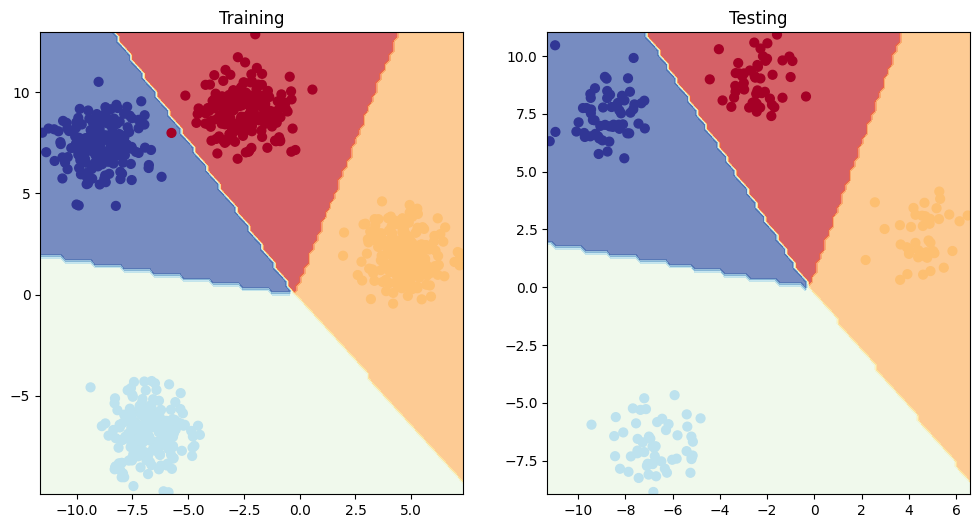

In [234]:
from helpers import plot_decision_boundary
# visualize
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_4, X_train_blob, y_train_blob)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_4,X_test_blob, y_test_blob)



In [243]:
# Pytorch metrics
from torchmetrics import Accuracy
metric = Accuracy(task="multiclass", num_classes=5)

metric(preds, y_test_blob)

tensor(1.)